# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scratch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
tf.keras.__version__

'2.4.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

11493376/11490434 [==============================] - 0s 0us/step


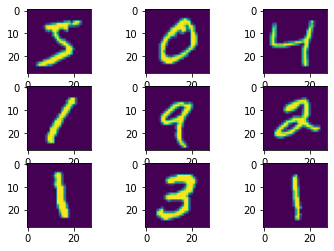

(60000, 28, 28)

In [ ]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

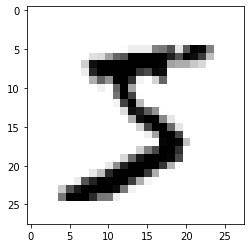

5 5


In [ ]:
#plt.imshow(X_train_full[125])
#X_train_full.dtype

fig = plt.figure
plt.imshow(X_train_full[0], cmap='gray_r')
plt.show()

# This array lists the classes of the label
# the labels are stored as indices of the classes
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]
print(y_train_full[0], class_names[y_train_full[0]])
# This label index of the image is 9, and it corresponds to the class Ankle boot

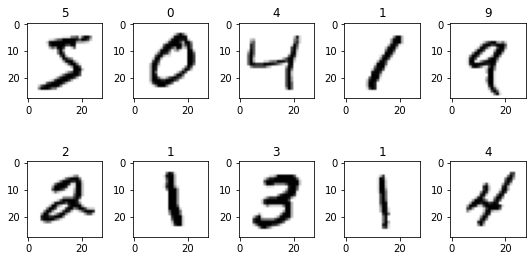

In [ ]:
# here I alos write this function to show the first 10 images in the dataset
# you can see there are clothes belonging to different classes, such as Ankle boot, T-shirt
# Our aim is to build a classifer that can classify the images to their classes
def image_plot(X, y, num=10):
    # plot data
    num_row = 2
    num_col = 5

    images = X[:num]
    labels = y[:num]

    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray_r')
        ax.set_title('{}'.format(class_names[labels[i]]))
    plt.tight_layout()
    plt.show()

image_plot(X_train_full, y_train_full)

In [ ]:
# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [ ]:
# Converts a class vector (integers) to one-hot encoding matrix.
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

y_train_full[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# get validation dataset
# then we need to get the validation dataset. We take 5 thoudsands images randomly from the training data, as the validation data
np.random.seed(42) 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

## Build and train the model

Build and train your model. 

In [ ]:
# TODO: Build your model

# The model starts with a input layer with 28 x 28 
model = keras.models.Sequential(
    [
      keras.Input(input_shape=[28, 28]),
      layers.Flatten(),
      layers.Dropout(rate=0.2),
      layers.Dense(200, activation="elu", kernel_initializer="he_normal"),
      layers.BatchNormalization(),
      layers.Dropout(rate=0.1),
      layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
      layers.BatchNormalization(),
      layers.Dropout(rate=0.1),
      layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
      layers.BatchNormalization(),
      layers.Dropout(rate=0.1),
      layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
      layers.Dropout(rate=0.1),
      layers.BatchNormalization(),
      layers.Dense(10, activation="softmax"),
  ]

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.0015),
              metrics=["accuracy"])

In [ ]:
# show the structure of your model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 200)               157000    
_________________________________________________________________
batch_normalization_16 (Batc (None, 200)               800       
_________________________________________________________________
dropout_20 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_17 (Batc (None, 100)              

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=2)
history = model.fit(X_train, y_train, batch_size=33, epochs=33, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, reduce_lr])

Epoch 1/33
1667/1667 [==============================] - 11s 6ms/step - loss: 0.5181 - accuracy: 0.8353 - val_loss: 0.1310 - val_accuracy: 0.9588
Epoch 2/33
1667/1667 [==============================] - 10s 6ms/step - loss: 0.2280 - accuracy: 0.9285 - val_loss: 0.0995 - val_accuracy: 0.9676
Epoch 3/33
1667/1667 [==============================] - 9s 6ms/step - loss: 0.1834 - accuracy: 0.9430 - val_loss: 0.0902 - val_accuracy: 0.9740
Epoch 4/33
1667/1667 [==============================] - 9s 6ms/step - loss: 0.1504 - accuracy: 0.9525 - val_loss: 0.0818 - val_accuracy: 0.9746
Epoch 5/33
1667/1667 [==============================] - 10s 6ms/step - loss: 0.1415 - accuracy: 0.9558 - val_loss: 0.0748 - val_accuracy: 0.9778
Epoch 6/33
1667/1667 [==============================] - 10s 6ms/step - loss: 0.1221 - accuracy: 0.9615 - val_loss: 0.0756 - val_accuracy: 0.9784
Epoch 7/33
1667/1667 [==============================] - 9s 6ms/step - loss: 0.1157 - accuracy: 0.9639 - val_loss: 0.0638 - val_accur

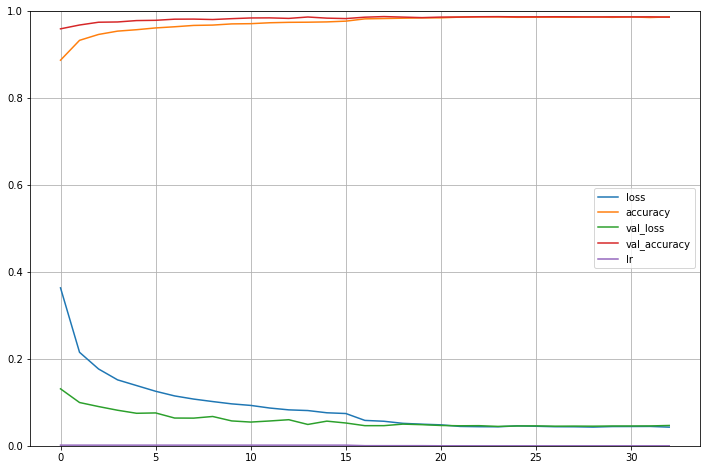

In [ ]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [ ]:
model.save('mnist.h1')

INFO:tensorflow:Assets written to: mnist.h1/assets


## Load the model and evaluate it on the test data

In [ ]:
model = keras.models.load_model("mnist.h1")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0433 - accuracy: 0.9870


[0.0433402918279171, 0.9869999885559082]

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met.

####**Number of neurons**
Before implemeting the neuronal network, three rules of thumb have been taken in consideration regarding the number of neurons. (https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer)

1. The number of hidden neurons should be between the size of the input layer (784) and the size of the output layer (10). 

2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer. (533)

3. The number of hidden neurons should be less than twice the size of the input layer. (1568)

Following these guidelines, the first implementation started with 500 hidden neurons. The number progressively increased until overfitting was reached.

####**Number of hidden layers**

Following the lecture made by the TA, it has been decided to start with two hidden layers and than progressively increasing the number until overfitting. This strategy rely on the well known qualities of Deep Neurons Networks (high parameter efficiency and hierarchical structurization of the features)

####**Batches Size and epochs**

The numbers of both mini batches and epochs have been set to 28 (sqrt of 784) and then gradually increased up to 33. Early stopping has also been implemented (with patience = 10).

####**Functions and initializers**

All nodes have an activation functions. To avoid saturation and vanishing gradients, the best ReLU variant for the activation function is the Exponential linear unit (ELU) activation function has been chosen. The He initializer has been chosen over the Glorot because it is more suited for Relu functions. 

After testing over the validation data set, the softmax function was preferred over the sigmoid function for the last layer. Finally, given the nature of the problem, the categorical cross entropy loss function has been selected to compile the model. The reason behind it is to avoid the loss of information that occur with the scarse categorical cross entropy loss function.

####**Normalisation**

To reduces the vanishing gradients problem and speed up the learning curve, batch normalisation has been systematically placed after the output of every hidden layers. 

####**Optimizer**

Combining the ideas of momentum optimisation (acceleration) and adaptive learning rates, the Adam optimizer has been preferred. First, the step size was set to 0.0015 then it was slowly decreased to improve the accuracy of the model using the ReduceOnPlateau function (patience = 2, factor of 0.2 over the validation accuracy). 

####**Dropout**

Finally, different dropout rates have been set in order to reduce overfitting.

####**Challenge**

Following the best practises increased significantly both the complexity and the time to compute the model. The model plateaued at 0.987 accurancy. 
